# Import packages

In [89]:
# Import packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import statsmodels.api as sm
import math

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Set figure parameters
plt.rcParams['figure.figsize'] = [10, 7.5]

# Input data

[*********************100%%**********************]  1 of 1 completed


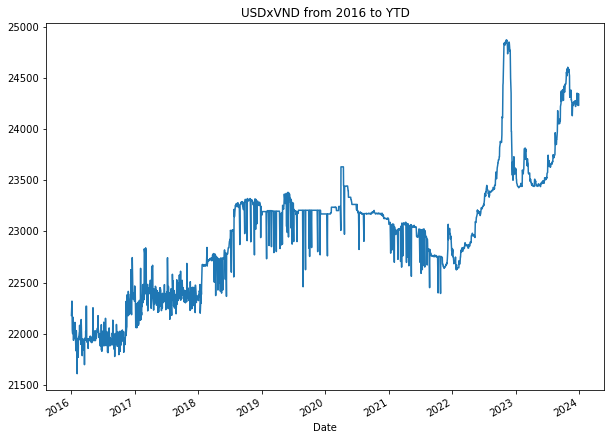

In [90]:
# Get data
data = yf.download('USDVND=X','2016-01-01','2024-01-01') # from 1 Jan 2021 to 31 December 2022

# Plot
data['Adj Close'].plot()
plt.title("USDxVND from 2016 to YTD")
plt.show()

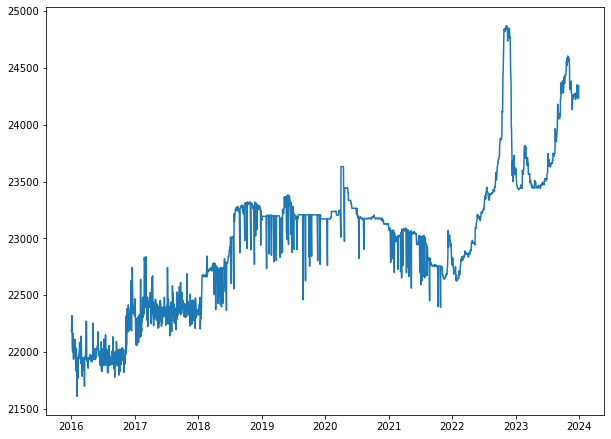

In [121]:
df = pd.DataFrame(data['Adj Close'])
plt.plot(df)
plt.show()

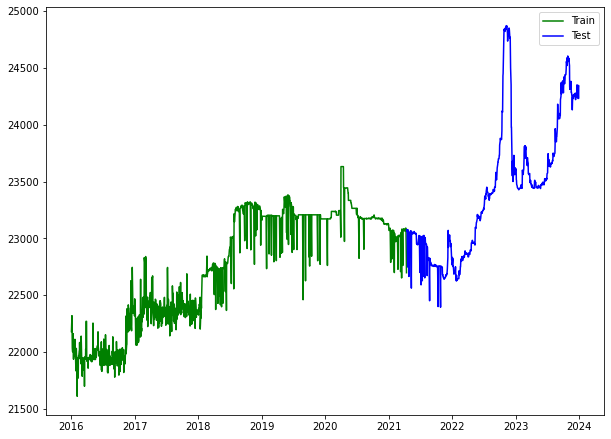

In [122]:
# Split into train and test data
to_row = int(len(df)*0.66)

df_train = pd.DataFrame(df[0:to_row]['Adj Close'])
list_train =  list(df[0:to_row]['Adj Close'])
df_test = list(df[to_row:]['Adj Close'])

# Plot
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Test')
plt.legend()
plt.show()

# Simple exponential smoothing (SES)

In [123]:
# Fit model
model = SimpleExpSmoothing(list_train).fit()

# Make prediction
yhat = model.predict(start = len(list_train), end = len(df)-1)

# Compare actual and predicted
ses_comp = pd.DataFrame(df[to_row:])
ses_comp.rename(columns={"Adj Close": "Actual"}, inplace=True)
ses_comp['Predict'] = yhat

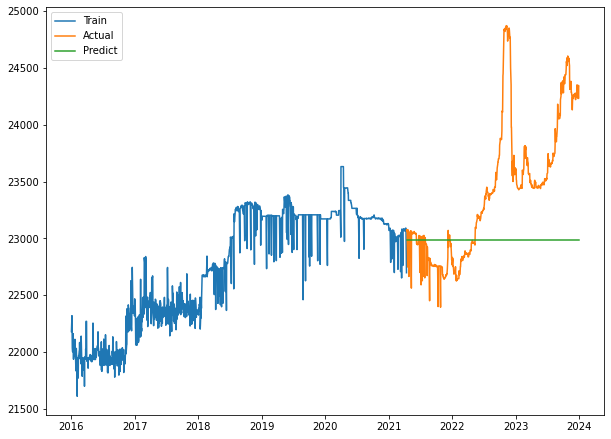

mse 529371.2273444311
rmse 727.5790179385543


In [124]:
# Plot
plt.plot(df_train.index, df_train.values, label = 'Train')
plt.plot(ses_comp.index,ses_comp['Actual'], label = 'Actual')
plt.plot(ses_comp.index,ses_comp['Predict'], label = 'Predict')
plt.legend(loc='best')
plt.show()

# Calculate errors
mse = np.square(np.subtract(ses_comp['Actual'],ses_comp['Predict'])).mean()
print('mse',mse)
rmse = math.sqrt(mse)
print('rmse',rmse)

# Holt's Linear Smoothing
Use when there is trend in data, and no seasonality

In [125]:
# Fit model
model = Holt(list_train)
model_fit = model.fit()

# Make prediction
yhat = model_fit.forecast(len(df_test))

# Compare actual and predicted
des_comp = pd.DataFrame(df[to_row:])
des_comp.rename(columns={"Adj Close": "Actual"}, inplace=True)
des_comp['Predict'] = yhat

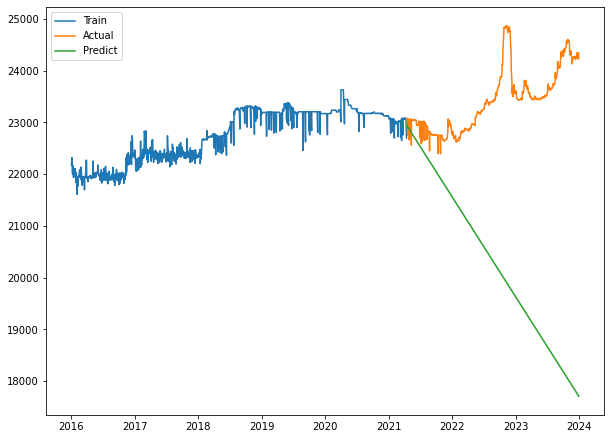

mse 529371.2273444311
rmse 727.5790179385543


In [126]:
# Plot
plt.plot(df_train.index, df_train.values, label = 'Train')
plt.plot(des_comp.index,des_comp['Actual'], label = 'Actual')
plt.plot(des_comp.index,des_comp['Predict'], label = 'Predict')
plt.legend(loc='best')
plt.show()

# Calculate errors
mse = np.square(np.subtract(ses_comp['Actual'],ses_comp['Predict'])).mean()
print('mse',mse)
rmse = math.sqrt(mse)
print('rmse',rmse)

# Holt Winter

In [127]:
model = ExponentialSmoothing(list_train, trend ='add', seasonal_periods = 12).fit()
print(model.summary())

yhat = model.forecast(len(df_test))

# Compare actual and predicted
hw_comp = pd.DataFrame(df[to_row:])
hw_comp.rename(columns={"Adj Close": "Actual"}, inplace=True)
hw_comp['Predict'] = yhat

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 1376
Model:             ExponentialSmoothing   SSE                       15970018.083
Optimized:                         True   AIC                          12886.380
Trend:                         Additive   BIC                          12907.288
Seasonal:                          None   AICC                         12886.441
Seasonal Periods:                  None   Date:                 Thu, 28 Mar 2024
Box-Cox:                          False   Time:                         02:11:10
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2173876                alpha                 True
smoothing_trend            0.01880

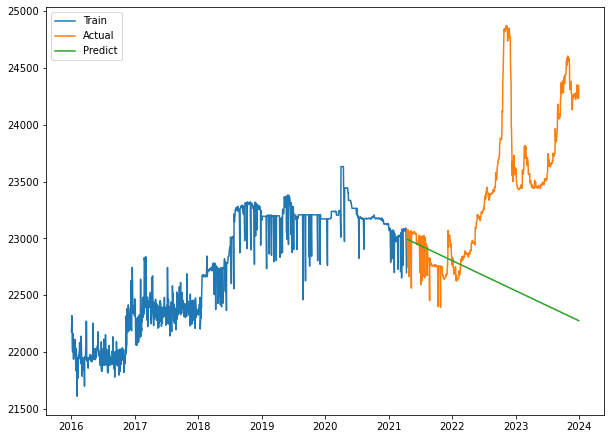

mse 1190125.627358748
rmse 1090.9287911494262


In [128]:
# Plot
plt.plot(df_train.index, df_train.values, label = 'Train')
plt.plot(hw_comp.index,hw_comp['Actual'], label = 'Actual')
plt.plot(hw_comp.index,hw_comp['Predict'], label = 'Predict')
plt.legend(loc='best')
plt.show()

# Calculate errors
mse = np.square(np.subtract(hw_comp['Actual'],hw_comp['Predict'])).mean()
print('mse',mse)
rmse = math.sqrt(mse)
print('rmse',rmse)